# 確認顯示卡的型號
```c
sudo lshw -numeric -C display
```


# 安裝相關套件
```c
sudo yum install wget curl kernel-devel epel-release dkms
sudo yum groupinstall "Development Tools"
```

# 修改 GRUB 設定，避免載入nouveau
```c
sudo vi /etc/default/grub
```

```c
GRUB_TIMEOUT=1
GRUB_DISTRIBUTOR="$(sed 's, release .*$,,g' /etc/system-release)"
GRUB_DEFAULT=saved
GRUB_DISABLE_SUBMENU=true
GRUB_TERMINAL="serial console"
GRUB_SERIAL_COMMAND="serial --speed=115200"
GRUB_CMDLINE_LINUX="console=tty0 crashkernel=auto console=ttyS0,115200 nouveau.modeset=0"
GRUB_DISABLE_RECOVERY="true"
```
```c
sudo vi /etc/modprobe.d/blacklist.conf
```

```c
blacklist nouveau
```

sudo grub2-mkconfig -o /boot/efi/EFI/centos/grub.cfg

```c
sudo mv /boot/initramfs-$(uname -r).img /boot/initramfs-$(uname -r)-nouveau.img
sudo dracut /boot/initramfs-$(uname -r).img $(uname -r)
```

```c
sudo reboot
```

# 確認 nouveau 已被停用
```c
sudo lshw -numeric -C display
```


# 下載驅動程式
```c
scp -i centos7.pem /mnt/d/nvidia-driver-local-repo-rhel7-440.33.01-1.0-1.x86_64.rpm cent@203.145.220.139:~/
```

```c
systemctl get-default
sudo yum install nvidia-driver-local-repo-rhel7-440.33.01-1.0-1.x86_64.rpm
sudo rpm -i nvidia-driver-local-repo-rhel7-440.33.01-1.0-1.x86_64.rpm
```

```c
yum list all | grep nvidia-driver
sudo yum clean all
sudo yum install cuda-drivers
```

sudo lshw -numeric -C display
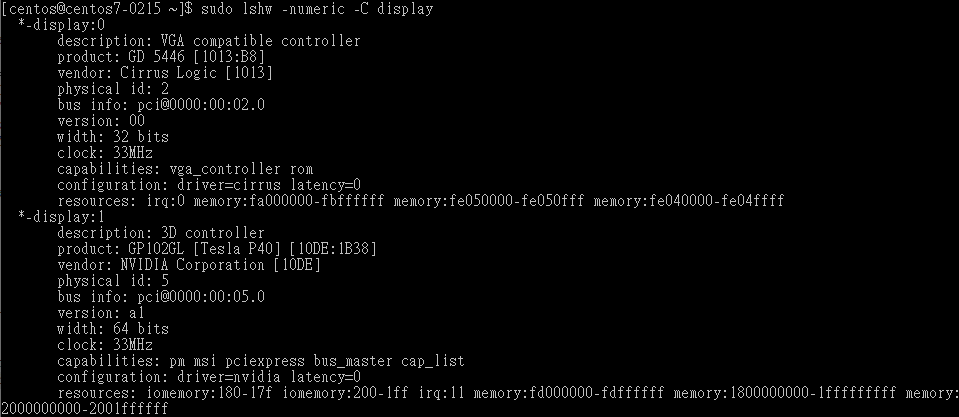
nvidia-smi
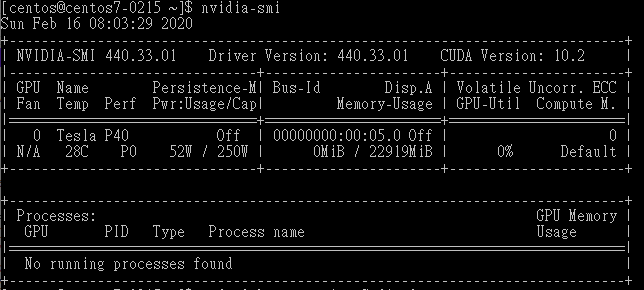

# 取得 NVIDIA GPU 的匯流排 ID
nvidia-xconfig --query-gpu-info
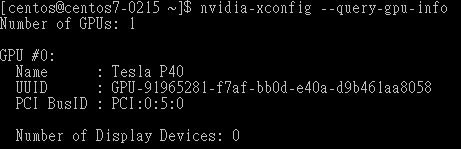

# 設定 xorg.conf
sudo nvidia-xconfig -a --allow-empty-initial-configuration --virtual=1920x1200

sudo yum install glx-utils mesa-libGL

# 安裝VirtualGL和TurboVNC
```c
sudo wget https://virtualgl.org/pmwiki/uploads/Downloads/VirtualGL.repo
sudo wget https://turbovnc.org/pmwiki/uploads/Downloads/TurboVNC.repo
sudo wget https://libjpeg-turbo.org/pmwiki/uploads/Downloads/libjpeg-turbo.repo
sudo mv *.repo /etc/yum.repos.d/
sudo yum install VirtualGL turbovnc libjpeg-turbo-official xorg-x11-utils
```

```c
sudo vglserver_config
```

```
... Creating vglusers group ...
... Creating /etc/opt/VirtualGL/ ...
... Granting read permission to /etc/opt/VirtualGL/ for vglusers group ...
... Setting SELinux contexts to allow vglgenkey to run within GDM ...
libsemanage.dbase_llist_query: could not query record value (No such file or directory).
/sbin/restorecon reset /etc/opt/VirtualGL context unconfined_u:object_r:etc_t:s0->unconfined_u:object_r:xdm_rw_etc_t:s0
/sbin/restorecon reset /usr/bin/xauth context system_u:object_r:xauth_exec_t:s0->system_u:object_r:xdm_exec_t:s0
... Modifying /etc/security/console.perms to disable automatic permissions
    for DRI devices ...
... Creating /etc/modprobe.d/virtualgl.conf to set requested permissions for
    /dev/nvidia* ...
... Attempting to remove nvidia module from memory so device permissions
    will be reloaded ...
rmmod: ERROR: Module nvidia is in use by: nvidia_modeset
... Granting write permission to /dev/nvidia0 /dev/nvidiactl /dev/nvidia-modeset for vglusers group ...
... Granting write permission to /dev/dri/card0 for vglusers group ...
... Modifying /etc/X11/xorg.conf.d/99-virtualgl-dri to enable DRI permissions
    for vglusers group ...
... /etc/X11/xorg.conf has been saved as /etc/X11/xorg.conf.orig.vgl ...
... Modifying /etc/X11/xorg.conf to enable DRI permissions
    for vglusers group ...
... /etc/lightdm/lightdm.conf has been saved as /etc/lightdm/lightdm.conf.orig.vgl ...
... Adding greeter-setup-script=vglgenkey to /etc/lightdm/lightdm.conf ...
... Setting default run level to 5 (enabling graphical login prompt) ...

Done. You must restart the display manager for the changes to take effect.

IMPORTANT NOTE: Your system uses modprobe.d to set device permissions. You
must execute rmmod nvidia with the display manager stopped in order for the
new device permission settings to become effective.
```
```c
sudo modprobe -r nvidia_drm nvidia_modeset nvidia
sudo vglserver_config
```

```c
... Creating vglusers group ...
groupadd: group 'vglusers' already exists
Could not add vglusers group (probably because it already exists.)
... Granting read permission to /etc/opt/VirtualGL/ for vglusers group ...
... Setting SELinux contexts to allow vglgenkey to run within GDM ...
... Modifying /etc/security/console.perms to disable automatic permissions
    for DRI devices ...
... Creating /etc/modprobe.d/virtualgl.conf to set requested permissions for
    /dev/nvidia* ...
... Granting write permission to /dev/nvidia0 /dev/nvidiactl /dev/nvidia-modeset for vglusers group ...
... Modifying /etc/X11/xorg.conf.d/99-virtualgl-dri to enable DRI permissions
    for vglusers group ...
... Modifying /etc/X11/xorg.conf to enable DRI permissions
    for vglusers group ...
... Adding greeter-setup-script=vglgenkey to /etc/lightdm/lightdm.conf ...
... Setting default run level to 5 (enabling graphical login prompt) ...

Done. You must restart the display manager for the changes to take effect.
```

```c
sudo gpasswd -a root vglusers
sudo gpasswd -a centos vglusers
```

# 安裝novnc
sudo yum install novnc numpy